In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/MyDrive/Belajar\ di\ BisaAi/Data\ Science/OJT/Sentiment\ Analysis

/content/gdrive/MyDrive/Belajar di BisaAi/Data Science/OJT/Sentiment Analysis


In [3]:
import pandas as pd
import glob

In [4]:
#Membaca semua data kemudian menggabungkannya menjadi satu
df = pd.DataFrame(columns=['Package Name', 'App Version Code', 'App Version Name',
       'Reviewer Language', 'Device', 'Review Submit Date and Time',
       'Review Submit Millis Since Epoch', 'Review Last Update Date and Time',
       'Review Last Update Millis Since Epoch', 'Star Rating', 'Review Title',
       'Review Text', 'Developer Reply Date and Time',
       'Developer Reply Millis Since Epoch', 'Developer Reply Text',
       'Review Link'])
files = glob.glob(r'*.csv')
for f in files:
    Data = pd.read_csv(f,sep=',',encoding="utf-16")
    df = pd.concat([Data,df])
    print(df.shape)

df.head()


(33, 16)
(39, 16)
(46, 16)
(47, 16)
(58, 16)
(96, 16)
(126, 16)
(165, 16)
(176, 16)
(185, 16)
(191, 16)


,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link
0,com.pos.bisaaiacademy,65.0,2.0.0.6,en,tiffany,2021-06-06T11:30:25Z,1622979025966,2021-06-07T00:09:34Z,1623024574985,5,NaN,NaN,NaN,NaN,NaN,NaN
1,com.pos.bisaaiacademy,NaN,NaN,id,santoni,2021-06-10T17:21:23Z,1623345683004,2021-06-10T18:23:58Z,1623349438270,1,NaN,"Gak recommended course nya, pas nanya materi k...",NaN,NaN,NaN,http://play.google.com/console/developers/5503...
2,com.pos.bisaaiacademy,65.0,2.0.0.6,en,OP4C7D,2021-06-12T15:46:23Z,1623512783990,2021-06-12T15:46:23Z,1623512783990,5,NaN,NaN,NaN,NaN,NaN,NaN
3,com.pos.bisaaiacademy,65.0,2.0.0.6,en,2026,2021-06-13T06:25:22Z,1623565522147,2021-06-13T06:25:22Z,1623565522147,5,NaN,NaN,NaN,NaN,NaN,NaN
4,com.pos.bisaaiacademy,65.0,2.0.0.6,en,a21s,2021-06-14T11:14:03Z,1623669243874,2021-06-14T11:14:03Z,1623669243874,5,NaN,Best AI Training apps,2021-06-19T09:13:07Z,1.624094e+12,"Hai Kak Tresno Games, Terima kasih atas sarann...",http://play.google.com/console/developers/5503...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 32
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Package Name                           191 non-null    object 
 1   App Version Code                       151 non-null    float64
 2   App Version Name                       151 non-null    object 
 3   Reviewer Language                      191 non-null    object 
 4   Device                                 190 non-null    object 
 5   Review Submit Date and Time            191 non-null    object 
 6   Review Submit Millis Since Epoch       191 non-null    object 
 7   Review Last Update Date and Time       191 non-null    object 
 8   Review Last Update Millis Since Epoch  191 non-null    object 
 9   Star Rating                            191 non-null    object 
 10  Review Title                           0 non-null      float64
 11  Review 

In [6]:
# Membuat new_df dari df
new_df = df[['Star Rating','Review Text']]
new_df.head()

,Star Rating,Review Text
0,5,NaN
1,1,"Gak recommended course nya, pas nanya materi k..."
2,5,NaN
3,5,NaN
4,5,Best AI Training apps


In [7]:
#Menambahkan kolom sentiment
sentiment = []
for _, row in new_df.iterrows():
  if row['Star Rating'] >= 4:
    sentiment.append('Positif')
  elif row['Star Rating'] == 3:
    sentiment.append('Netral')
  else:
    sentiment.append('Negatif')

new_df['Sentiment'] = sentiment
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Star Rating,Review Text,Sentiment
0,5,NaN,Positif
1,1,"Gak recommended course nya, pas nanya materi k...",Negatif
2,5,NaN,Positif
3,5,NaN,Positif
4,5,Best AI Training apps,Positif


In [8]:
import numpy as np
#mengganti comment kosong yg positif menjadi bagus
new_df['Review Text'] = np.where((new_df['Review Text'].isna() & new_df.Sentiment.str.contains('Positif')),'bagus',new_df['Review Text'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
new_df.isna().sum()

Star Rating    0
Review Text    3
Sentiment      0
dtype: int64

In [10]:
#mengganti comment kosong yg selain yg positif menjadi nocomment
new_df['Review Text'] = new_df['Review Text'].fillna('nocomment')
new_df.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Star Rating    0
Review Text    0
Sentiment      0
dtype: int64

In [11]:
#Melihat Persebaran Datanya
new_df.groupby(['Sentiment','Star Rating'])['Review Text'].count()

Sentiment  Star Rating
Negatif    1                7
           2                7
Netral     3                5
Positif    4                9
           5              163
Name: Review Text, dtype: int64

In [12]:
print(new_df['Review Text'].values)

['bagus'
 'Gak recommended course nya, pas nanya materi ke mentornya malah dibatasi topiknya padahal masih relevan sama course yg diambil, waktu itu dikasih cp mentor tpi chat gak dibales balas sampe waktu workshop nya habis gak ada balasan, materi juga gak jelas cmn implementasi doang gak ada penjelasan metode nya, youtube lebih membantu sih dibanding ini, semoga bisa di upgrade lgi kualitas mentor dan materinya'
 'bagus' 'bagus' 'Best AI Training apps'
 'Jangan buat aplikasi dah kalo kagak bisa dipake' 'bagus'
 'Gudangnya pengetahuan.' 'bagus' 'bagus' 'bagus' 'bagus'
 'Untuk kelas excel for analytic nilai quiz nya di perbaiki dong, masa 1 soal nilai nya 5point untuk 10 soal, kalau bener semua cuman dapet 50 sedangkan minimal lulus harus 80'
 'bagus'
 'Aplikasinya bagus, akan tetapi ada saran untuk tampilan. Tulisan pada materi di silabus kecil sekali, rumus terkadang tidak muncul. Untuk kompetisi dibedakan dong yang sudah lewat sama yang sedang berlangsung.'
 'bagus' 'Sangat membantu

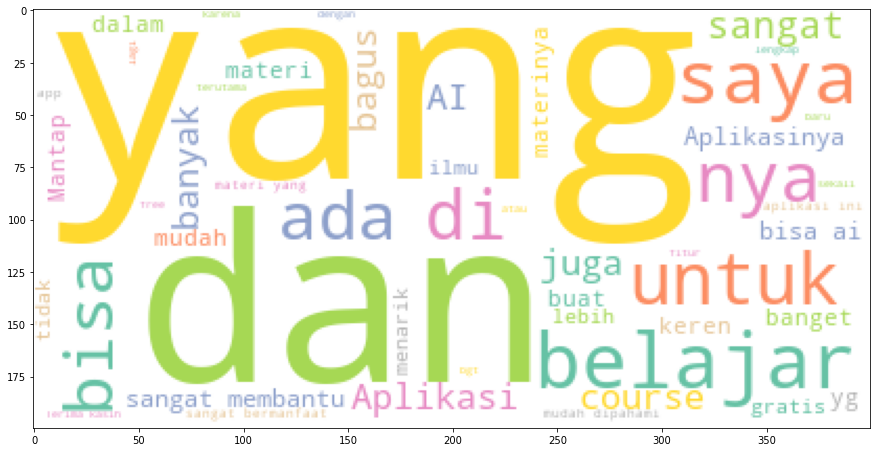

In [13]:
#Lihat persebaran kata di review text yang positif
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Positif')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

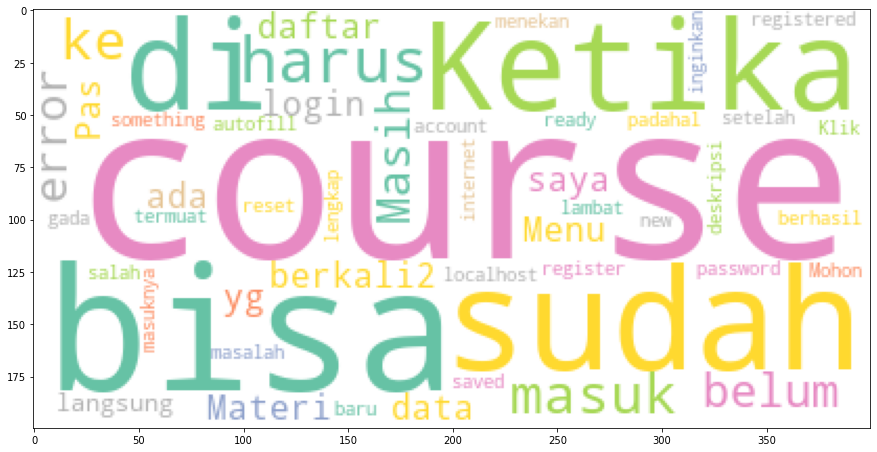

In [14]:
#Lihat persebaran kata di review text yang netral
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Netral')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

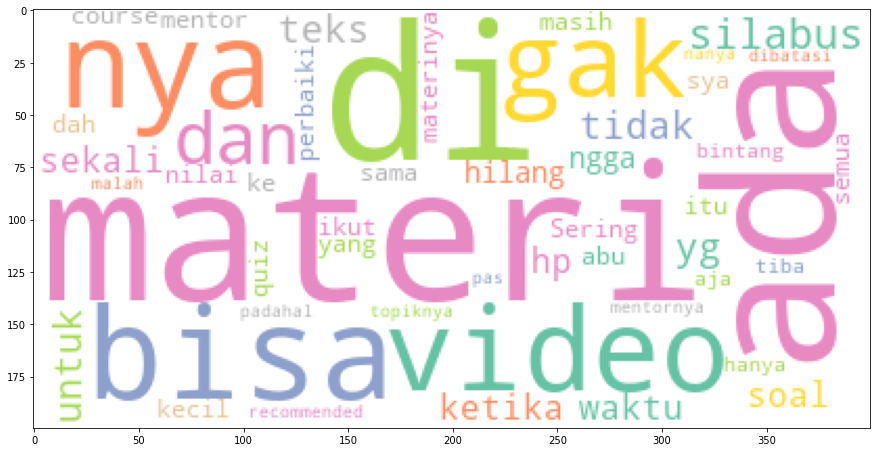

In [15]:
#Lihat persebaran kata di review text yang negatif
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Negatif')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

# Preprocessing Text

In [16]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 5.2MB/s 


In [17]:
#Pre Process Text untuk menghilangkan stop word
from nltk.tokenize import sent_tokenize, word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import re
import string

def pre_process(text):
    # Case Folding: Lowercase
    # Merubah format teks menjadi format huruf kecil semua (lowercase).
    text = text.lower()

    # Case Folding: Removing Number
    # Menghapus karakter angka.
    text = re.sub(r"\d+", "", text)
    # Menghapus kata yg kurang dari 4 huruf
    text = re.sub(r'\b\w{1,3}\b', '', text)

    # Case Folding: Removing Punctuation
    # Menghapus karakter tanda baca.
    text = text.translate(str.maketrans("","",string.punctuation))

    #Case Folding: Removing Whitespace
    #Menghapus karakter kosong.
    text = text.strip()

    #Menghapus emote icon
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    text = emoji_pattern.sub(r'', text) # no emoji
    
    #Separating Sentences with Split () Method
    #Fungsi split() memisahkan string ke dalam list dengan spasi sebagai pemisah jika tidak ditentukan pemisahnya.
    pisah = text.split()
    # atau dengan re.split(r'\s+',text)

    #Filtering using sastrawi
    # Ambil Stopword bawaan
    stop_factory = StopWordRemoverFactory().get_stop_words()
    more_stopword = ['dengan', 'ia','bahwa','oleh','ngga','jadi','doang','yg','tdk']
    # Merge stopword
    data = stop_factory + more_stopword
    # Menfilter stopword dengan tambahan stopword baru
    dictionary = ArrayDictionary(data)
    stopword = StopWordRemover(dictionary)
    text =  stopword.remove(text)

    return text

new_df['Review Text'] = new_df['Review Text'].apply(lambda x:pre_process(x))
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Star Rating,Review Text,Sentiment
0,5,bagus,Positif
1,1,recommended course nanya materi mentornya m...,Negatif
2,5,bagus,Positif
3,5,bagus,Positif
4,5,best training apps,Positif


In [18]:
# #Fungsi split() memisahkan string ke dalam list dengan spasi sebagai pemisah jika tidak ditentukan pemisahnya.
# new_df['Review Text'] = new_df['Review Text'].str.split()

In [19]:
print(new_df['Review Text'].values)

['bagus'
 'recommended course   nanya materi  mentornya malah dibatasi topiknya padahal relevan sama course  diambil waktu  dikasih  mentor  chat  dibales balas sampe waktu workshop  habis   balasan materi  jelas  implementasi   penjelasan metode  youtube lebih membantu  dibanding  semoga  upgrade  kualitas mentor  materinya'
 'bagus' 'bagus' 'best  training apps'
 'jangan buat aplikasi  kalo kagak dipake' 'bagus' 'gudangnya pengetahuan'
 'bagus' 'bagus' 'bagus' 'bagus'
 'kelas excel  analytic nilai quiz   perbaiki dong masa  soal nilai  point  soal kalau bener semua cuman dapet  minimal lulus'
 'bagus'
 'aplikasinya bagus tetapi  saran tampilan tulisan materi  silabus kecil sekali rumus terkadang muncul kompetisi dibedakan dong sudah lewat sama sedang berlangsung'
 'bagus' 'sangat membantu' 'nocomment'
 '  course  nilai kuisnya mentok    padahal jawabannya yakin benar berkali dicek  disesuaikan materi mohon bantuannya'
 'bagus'
 'aplikasi anak bangsa luar biasa sangat membantu orang t

# Tokenisasi bisa dengan cara ini

In [20]:
# from sklearn.feature_extraction.text import CountVectorizer
# #Menghitung Token
# def hitungtoken(wm,feat_names):
#   doc_names = ['data{:d}'.format(idx) for idx,_ in enumerate(wm)]
#   df=pd.DataFrame(wm.toarray(),index=doc_names,columns=feat_names)
#   return df

In [21]:
# token=CountVectorizer(lowercase=True)
# wm=token.fit_transform(new_df['Review Text'])
# hasil_token=token.get_feature_names()

# hitungtoken(wm,hasil_token)

In [22]:
# hasil_token[50:60]

# Melihat grafik persebaran perkata & 2 kata

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
def top_n_ngram(corpus,n = None,ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus) #Have the count of  all the words for each review
    sum_words = bag_of_words.sum(axis =0) #Calculates the count of all the word in the whole review
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

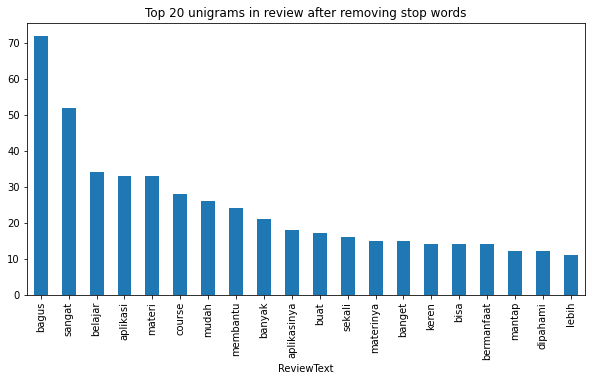

In [24]:
common_words = top_n_ngram(new_df['Review Text'], 20,1)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 unigrams in review after removing stop words')

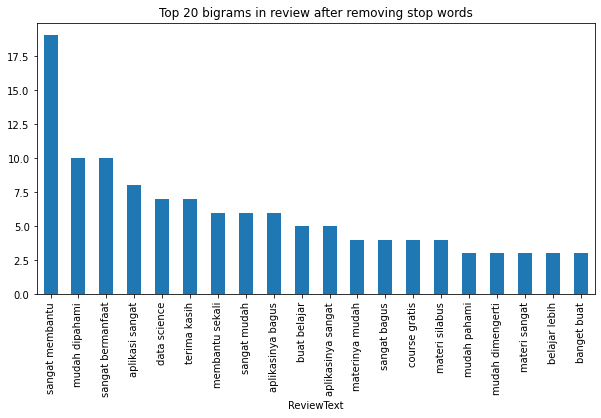

In [25]:
common_words = top_n_ngram(new_df['Review Text'], 20,2)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 bigrams in review after removing stop words')

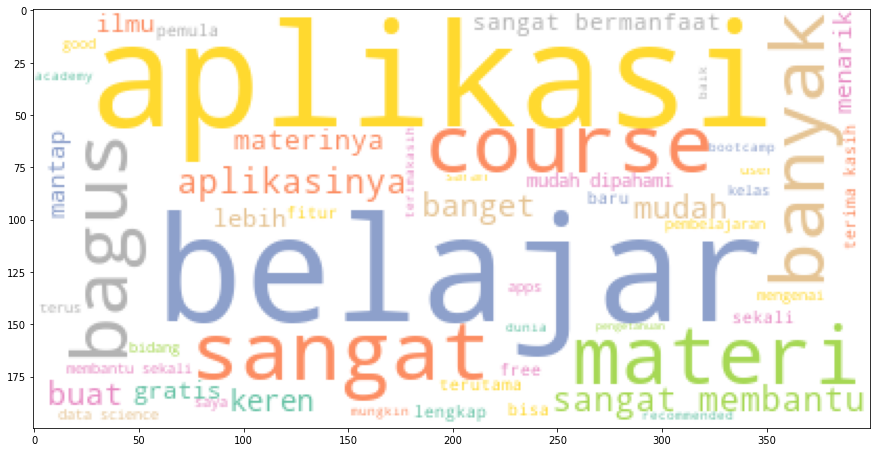

In [26]:
#Lihat persebaran kata di review text nya setelah di pre process
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Positif')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

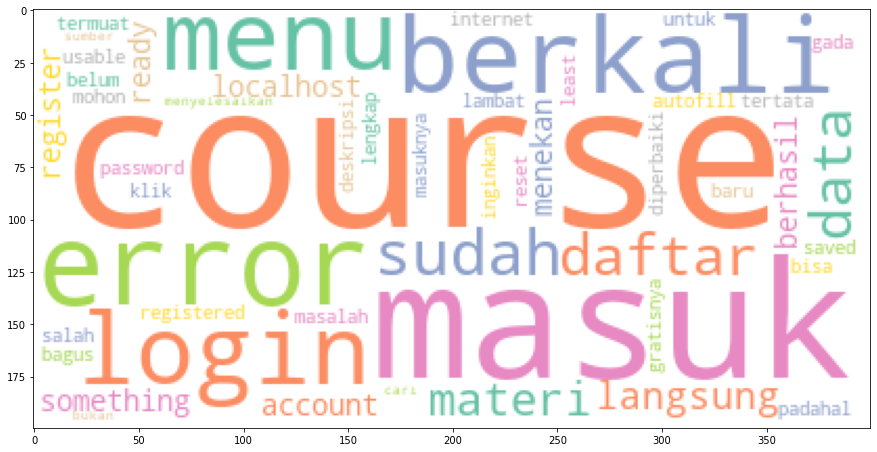

In [27]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Netral')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

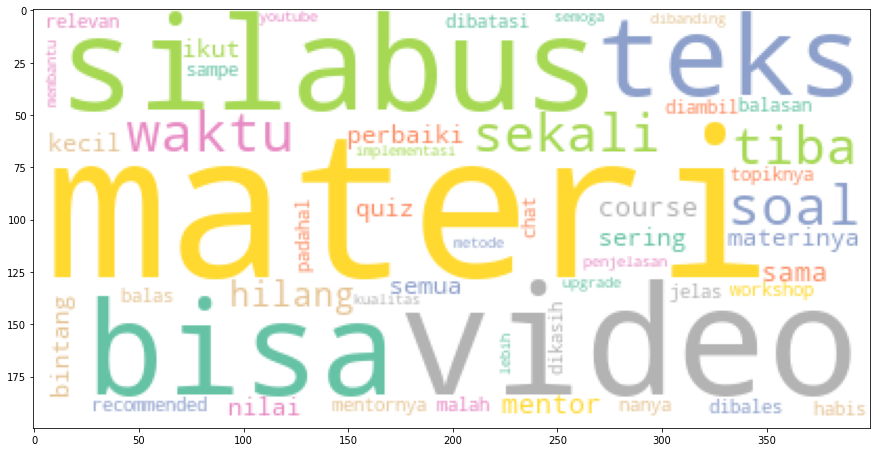

In [28]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['Sentiment'].str.contains('Negatif')]['Review Text'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

In [29]:
#drop column Star Rating
new_df = new_df.drop(columns=['Star Rating'])

# Pembuatan Model

## Memisah antara data latih dan test

In [30]:
# #Merubah nilai target dari string ke array
# from sklearn.preprocessing import OneHotEncoder

# X = OneHotEncoder(sparse=False).fit_transform(

#   new_df['Review Text'].to_numpy().reshape(-1, 1)

# )

In [189]:
y = new_df['Sentiment']
X = new_df["Review Text"]
print(y.value_counts())

#Merubah nilai target dari string ke numerik
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
print(pd.DataFrame(y).value_counts())

Positif    172
Negatif     14
Netral       5
Name: Sentiment, dtype: int64
2    172
0     14
1      5
dtype: int64


## Meng convert funtions to vector atau Feature Extraction

In [190]:
#Mengconvert Text dalam kolom review text menjadi array
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index

X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X,maxlen=max_length, 
                             padding=padding_type, truncating=trunc_type)


In [191]:
# Me reverse hasil array menjadi text
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(X[1]))


recommended course nanya materi mentornya malah dibatasi topiknya padahal relevan sama course diambil waktu dikasih mentor chat dibales balas sampe waktu workshop habis balasan materi jelas implementasi penjelasan metode youtube lebih membantu dibanding semoga upgrade kualitas mentor materinya ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?


In [192]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,41,7,238,5,239,139,240,241,62,242,49,7,243,87,244,140,245,246,247,248,87,249,250,251,5,141,252,88,253,254,21,9,255,63,256,257,140,14,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,258,259,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
187,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
188,221,10,658,659,181,182,3,217,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
189,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Class=2, n=172 (90.052%)
Class=0, n=14 (7.330%)
Class=1, n=5 (2.618%)


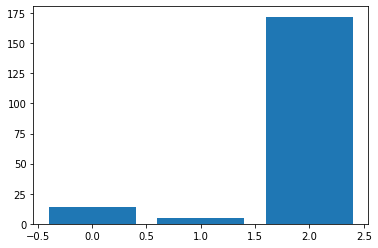

In [193]:
from collections import Counter
import matplotlib.pyplot as plt
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=2, n=172 (33.333%)
Class=0, n=172 (33.333%)
Class=1, n=172 (33.333%)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


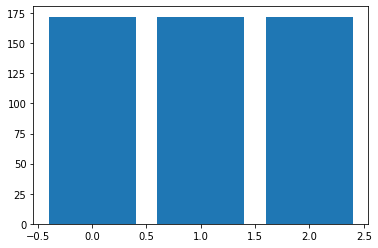

In [194]:
#Me resampling imbalance data (target nya ngak imbang)
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE(k_neighbors=2)
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [195]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,41,7,238,5,239,139,240,241,62,242,49,7,243,87,244,140,245,246,247,248,87,249,250,251,5,141,252,88,253,254,21,9,255,63,256,257,140,14,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,258,259,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,74,103,48,138,52,110,47,54,123,104,454,144,434,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
512,47,84,277,354,78,127,88,105,354,4,61,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
513,3,128,95,444,218,278,231,140,480,129,115,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
514,36,444,12,48,414,431,412,48,158,447,307,137,174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [196]:
#Rubah targetnya menjadi categorical sesuai dengan jumlah targetnya karena LSTM nggak bisa dilatih jika bukan categorical
from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(y_train, 3)
# y_test = to_categorical(y_test, 3)
y = to_categorical(y, 3)

In [197]:
from sklearn.model_selection import train_test_split
# Create a train-test split of these variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print("Training data size : ", X_train.shape)
print("Test data size : ", X_test.shape)

Training data size :  (412, 100)
Test data size :  (104, 100)


In [198]:
y_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

# Permodelan dengan LSTM

In [199]:
# Pembuatan Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import keras

In [200]:
top_words = 10000
max_review_length = 100
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))

# # model.add(LSTM(100))
# # model.add(Dense(1, activation='sigmoid'))

model.add(Bidirectional(LSTM(units = 10, return_sequences= True)))
model.add(Dropout(rate=0.2))
model.add(Bidirectional(LSTM(units = 10, return_sequences= False)))
model.add(Dropout(rate=0.3))
model.add(Dense(10,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 32)           320032    
_________________________________________________________________
bidirectional_20 (Bidirectio (None, 100, 20)           3440      
_________________________________________________________________
dropout_19 (Dropout)         (None, 100, 20)           0         
_________________________________________________________________
bidirectional_21 (Bidirectio (None, 20)                2480      
_________________________________________________________________
dropout_20 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_21 (Dense)             (None, 3)               

In [201]:
#Train Model
history = model.fit(X_train,y_train, epochs=50, batch_size=64, validation_split=0.2,verbose=1,shuffle=True)

Epoch 1/50
6/6 [==============================] - 12s 607ms/step - loss: 1.0990 - accuracy: 0.3124 - val_loss: 1.0985 - val_accuracy: 0.3253
Epoch 2/50
6/6 [==============================] - 1s 134ms/step - loss: 1.0967 - accuracy: 0.3280 - val_loss: 1.0975 - val_accuracy: 0.3976
Epoch 3/50
6/6 [==============================] - 1s 140ms/step - loss: 1.0955 - accuracy: 0.3651 - val_loss: 1.0959 - val_accuracy: 0.3133
Epoch 4/50
6/6 [==============================] - 1s 157ms/step - loss: 1.0941 - accuracy: 0.3900 - val_loss: 1.0919 - val_accuracy: 0.4578
Epoch 5/50
6/6 [==============================] - 1s 136ms/step - loss: 1.0894 - accuracy: 0.4265 - val_loss: 1.0876 - val_accuracy: 0.3253
Epoch 6/50
6/6 [==============================] - 1s 137ms/step - loss: 1.0809 - accuracy: 0.3578 - val_loss: 1.0827 - val_accuracy: 0.3253
Epoch 7/50
6/6 [==============================] - 1s 136ms/step - loss: 1.0728 - accuracy: 0.3750 - val_loss: 1.0721 - val_accuracy: 0.3253
Epoch 8/50
6/6 [===

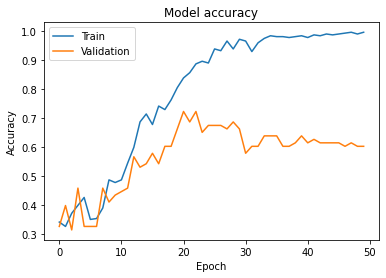

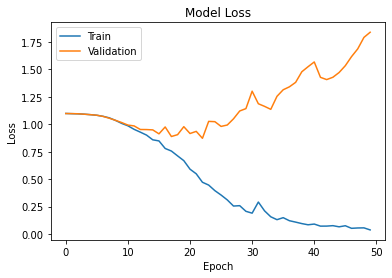

In [202]:
#Menampilkan hasil training model ke dalam grafik
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()
  

# Evaluasi Model

In [203]:
model.metrics_names

['loss', 'accuracy']

In [204]:
#Model Accuration
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 22ms/step - loss: 1.8969 - accuracy: 0.5385


[1.896919846534729, 0.5384615659713745]

In [205]:
#Evaluasi Model

y_pred_test = model.predict_classes(X_test) #kenapa predict_classed karena targetnya berupa categorical
print(y_pred_test)
print('Confusion matrix:')
confusion_matrix(y_test.argmax(axis=1), y_pred_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[1 2 2 0 2 0 2 2 0 1 1 0 1 2 0 0 1 2 1 1 2 2 1 0 2 2 0 0 2 1 2 2 1 2 1 2 0
 0 0 0 2 2 2 0 0 0 0 0 1 1 2 2 2 0 1 1 2 2 1 2 2 0 0 2 0 0 0 1 0 1 1 0 2 2
 0 1 2 1 0 1 0 0 0 1 2 2 0 2 0 0 0 0 0 1 2 0 0 1 2 1 2 1 0 2]
Confusion matrix:


array([[21, 10,  7],
       [12, 14,  9],
       [ 7,  3, 21]])

In [206]:
print('Classification Report:')
print(classification_report(y_test.argmax(axis=1),y_pred_test))
print('Accruracy Test :\n',accuracy_score(y_test.argmax(axis=1),y_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.55      0.54        38
           1       0.52      0.40      0.45        35
           2       0.57      0.68      0.62        31

    accuracy                           0.54       104
   macro avg       0.54      0.54      0.54       104
weighted avg       0.54      0.54      0.53       104

Accruracy Test :
 0.5384615384615384


In [207]:
#Model Accuration
model.evaluate(X_train,y_train)

13/13 [==============================] - 0s 24ms/step - loss: 0.3863 - accuracy: 0.9175


[0.38626253604888916, 0.917475700378418]

In [208]:
y_pred_train = model.predict_classes(X_train)
print(y_pred_train)
print('Confusion matrix:')
confusion_matrix(y_train.argmax(axis=1), y_pred_train)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[1 0 2 1 2 2 1 2 0 2 1 2 2 1 1 1 0 0 1 0 0 2 2 0 1 1 0 1 1 2 2 1 2 1 2 0 2
 1 0 1 1 2 2 2 1 0 1 1 2 2 2 2 2 2 1 2 1 0 1 0 2 0 1 1 1 0 2 1 2 2 1 0 2 2
 1 0 0 2 2 2 0 0 0 0 1 2 1 1 2 2 0 1 0 0 1 0 2 1 2 1 0 1 0 0 1 0 1 0 0 2 0
 0 2 2 0 0 2 1 1 2 2 2 2 1 2 2 2 2 0 2 1 2 0 1 1 0 1 0 1 2 0 1 0 2 2 0 1 2
 2 0 0 0 2 1 1 1 1 1 1 1 0 0 1 2 1 1 0 0 0 2 1 2 0 1 1 2 0 0 2 0 2 1 2 0 0
 2 2 2 1 0 2 2 2 1 1 0 2 0 1 2 1 1 1 2 1 1 2 2 2 1 0 0 1 2 0 2 0 1 0 2 1 0
 0 2 2 2 0 1 0 0 0 1 1 0 0 0 2 1 1 1 1 0 2 2 2 0 2 1 2 1 2 2 0 0 0 1 1 2 1
 1 2 0 2 1 0 1 2 2 0 1 2 0 2 1 0 1 2 0 2 0 0 2 0 1 1 2 1 2 1 0 2 0 2 0 0 2
 1 2 2 0 0 1 0 0 1 0 2 2 1 0 2 2 0 0 1 0 0 0 1 0 1 0 2 2 0 1 1 2 1 0 0 1 2
 2 1 1 2 1 1 1 2 0 0 2 2 0 0 2 2 0 2 1 2 2 0 2 0 2 1 1 0 0 0 1 2 1 0 2 2 0
 2 0 0 0 0 2 2 0 0 1 2 2 0 2 0 0 2 0 2 1 1 1 0 1 0 2 1 1 1 2 0 2 0 1 0 2 1
 2 0 2 0 2]
Confusion matrix:


array([[123,   3,   8],
       [ 10, 122,   5],
       [  4,   4, 133]])

In [209]:
print('Classification Report:')
print(classification_report(y_train.argmax(axis=1),y_pred_train))
print('Accruracy Train :\n',accuracy_score(y_train.argmax(axis=1),y_pred_train))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       134
           1       0.95      0.89      0.92       137
           2       0.91      0.94      0.93       141

    accuracy                           0.92       412
   macro avg       0.92      0.92      0.92       412
weighted avg       0.92      0.92      0.92       412

Accruracy Train :
 0.9174757281553398


# Test Model dengan data baru

In [210]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

sample_string = "materinya lengkap sangat bagus"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(new_df['Review Text']) #Tokenize text dari data latih
word_index = tokenizer.word_index

sample = tokenizer.texts_to_sequences([sample_string])
padded_sample = pad_sequences(sample,maxlen=max_length,padding=padding_type, truncating=trunc_type)
padded_sample.shape

y_pred = model.predict_classes(padded_sample)
print("Padded sample", padded_sample)
if y_pred == 0:
  hasil = "Negatif"
elif y_pred == 1:
  hasil = 'Netral'
else:
  hasil = 'Positif'
print("Sentiment tersebut adalah sentiment:",hasil)

Padded sample [[14 31  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]]
Sentiment tersebut adalah sentiment: Positif


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [211]:
print(decode_review(padded_sample[0]))

materinya lengkap sangat bagus ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?


In [212]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

sample_string = "jelek dan nggak berguna nih aplikasi tidak sesuai ekspetasi"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(new_df['Review Text']) #Tokenize text dari data latih
word_index = tokenizer.word_index

sample = tokenizer.texts_to_sequences([sample_string])
padded_sample = pad_sequences(sample,maxlen=max_length,padding=padding_type, truncating=trunc_type)
padded_sample.shape

y_pred = model.predict_classes(padded_sample)
print("Padded sample", padded_sample)
if y_pred == 0:
  hasil = "Negatif"
elif y_pred == 1:
  hasil = 'Netral'
else:
  hasil = 'Positif'
print("Sentiment tersebut adalah sentiment:",hasil)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Padded sample [[  1   1   1   1   1   6 212 333   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]]
Sentiment tersebut adalah sentiment: Negatif


In [213]:
print(decode_review(padded_sample[0]))

<OOV> <OOV> <OOV> <OOV> <OOV> aplikasi tidak sesuai <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?


In [214]:
from keras.models import load_model

model.save('Waris_LSTM-SentimentAnalysis.h5')  # creates a HDF5 file 'my_model.h5'




In [215]:
# returns a compiled model
model_load = load_model('Waris_LSTM-SentimentAnalysis.h5')

In [216]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

sample_string = "ternyata tidak bermanfaat nih aplikasi"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(new_df['Review Text']) #Tokenize text dari data latih
word_index = tokenizer.word_index

sample = tokenizer.texts_to_sequences([sample_string])
padded_sample = pad_sequences(sample,maxlen=max_length,padding=padding_type, truncating=trunc_type)
padded_sample.shape

y_pred = model_load.predict_classes(padded_sample)
print("Padded sample", padded_sample)
if y_pred == 0:
  hasil = "Negatif"
elif y_pred == 1:
  hasil = 'Netral'
else:
  hasil = 'Positif'
print("Sentiment tersebut adalah sentiment:",hasil)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Padded sample [[161 212  18   1   6   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]]
Sentiment tersebut adalah sentiment: Negatif


In [217]:
print(decode_review(padded_sample[0]))

ternyata tidak bermanfaat <OOV> aplikasi ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?


In [221]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

sample_string = "lumayan dibanding dengan aplikasi yang lain"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(new_df['Review Text']) #Tokenize text dari data latih
word_index = tokenizer.word_index

sample = tokenizer.texts_to_sequences([sample_string])
padded_sample = pad_sequences(sample,maxlen=max_length,padding=padding_type, truncating=trunc_type)
padded_sample.shape

y_pred = model_load.predict_classes(padded_sample)
print("Padded sample", padded_sample)
if y_pred == 0:
  hasil = "Negatif"
elif y_pred == 1:
  hasil = 'Netral'
else:
  hasil = 'Positif'
print("Sentiment tersebut adalah sentiment:",hasil)

Padded sample [[  1 255   1   6 114 656   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]]
Sentiment tersebut adalah sentiment: Negatif


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [222]:
print(decode_review(padded_sample[0]))

<OOV> dibanding <OOV> aplikasi yang lain ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?


In [218]:
# As the warning suggest, Please use instead:

#     np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
#     (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
